In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import dataset
df = pd.read_csv('./dataset/230322_OlderPredictTc_data_thermal.csv')

print("Number unique participants before exclustion:", len(df['id_all'].unique()))

# Select only time > 0
df = df[df.time > 0]
# Select only people >= 60
df = df[df.age >= 60]

# Remove ID 26 (id_all = 93) from heatwave 2 (hot) due to incomplete data (only ran until 469 minutes instead of full 480)
condition_mask = (df['study'] == 'heatwave 2 (indoor)') & (df['condition'] == 'hot')
df = df[~((df['id'] == 26) & condition_mask)]

print("Number unique participants after exclustion:", len(df['id_all'].unique()))

Number unique participants before exclustion: 96
Number unique participants after exclustion: 76


In [34]:
from sklearn.model_selection import train_test_split

# Get unique 'id_all' values
unique_ids = df['id_all'].unique()

# Split 'id_all' into training and testing groups with a 60/40 ratio
# Seed random number 1-1,000,000
train_ids, test_ids = train_test_split(unique_ids, test_size=0.4)

# Create train and test dataframes based on 'id_all'
train_data = df[df['id_all'].isin(train_ids)]
test_data = df[df['id_all'].isin(test_ids)]

In [38]:
train_ids, test_ids

(array([46, 34, 68, 30, 40, 98, 89, 65, 24, 58, 85, 67, 28, 39, 35, 77, 26,
        80, 70, 37, 52, 56, 74, 78, 71, 60, 86, 43, 91, 82, 22, 59, 21, 87,
        95, 66, 44, 25, 76, 94, 53, 32, 73, 23, 49]),
 array([61, 97, 50, 83, 81, 75, 96, 36, 72, 62, 27, 84, 63, 69, 79, 42, 92,
        88, 33, 55, 64, 54, 93, 45, 29, 47, 48, 38, 57, 90, 41]))

In [2]:
train_ids = [46, 34, 68, 30, 40, 98, 89, 65, 24, 58, 85, 67, 28, 39, 35, 77, 26,
        80, 70, 37, 52, 56, 74, 78, 71, 60, 86, 43, 91, 82, 22, 59, 21, 87,
        95, 66, 44, 25, 76, 94, 53, 32, 73, 23, 49]

test_ids = [61, 97, 50, 83, 81, 75, 96, 36, 72, 62, 27, 84, 63, 69, 79, 42, 92,
        88, 33, 55, 64, 54, 93, 45, 29, 47, 48, 38, 57, 90, 41]

train_ids.sort()
test_ids.sort()
print(train_ids)

print(test_ids)

train_data = df[df['id_all'].isin(train_ids)]
test_data = df[df['id_all'].isin(test_ids)]

[21, 22, 23, 24, 25, 26, 28, 30, 32, 34, 35, 37, 39, 40, 43, 44, 46, 49, 52, 53, 56, 58, 59, 60, 65, 66, 67, 68, 70, 71, 73, 74, 76, 77, 78, 80, 82, 85, 86, 87, 89, 91, 94, 95, 98]
[27, 29, 33, 36, 38, 41, 42, 45, 47, 48, 50, 54, 55, 57, 61, 62, 63, 64, 69, 72, 75, 79, 81, 83, 84, 88, 90, 92, 93, 96, 97]


In [3]:
# Count unique 'id_all' for each 'study'-'condition' combination in training and testing sets
train_counts = train_data.groupby(['study', 'condition'])['id_all'].nunique()
test_counts = test_data.groupby(['study', 'condition'])['id_all'].nunique()

# Calculate total unique 'id_all' for each 'study'-'condition' combination
total_counts = df.groupby(['study', 'condition'])['id_all'].nunique()

# Calculate proportions
train_proportions = train_counts / total_counts
test_proportions = test_counts / total_counts

# Combine results into a single DataFrame
result = pd.concat([train_counts, train_proportions, test_counts, test_proportions], axis=1)
result.columns = ['Train Count', 'Train Proportion', 'Test Count', 'Test Proportion']

result

Train Count  Train Proportion  Test Count  \
study                  condition                                              
heatwave 1 (prolonged) hot                 26          0.666667          13   
heatwave 2 (indoor)    cool                 8          0.500000           8   
                       hot                 22          0.628571          13   
                       temp                 8          0.500000           8   
                       warm                22          0.594595          15   
heatwave 3 (cooling)   hot                 10          0.526316           9   

                                  Test Proportion  
study                  condition                   
heatwave 1 (prolonged) hot               0.333333  
heatwave 2 (indoor)    cool              0.500000  
                       hot               0.371429  
                       temp              0.500000  
                       warm              0.405405  
heatwave 3 (cooling)   hot               0.473684

/var/folders/8q/byh6pjkx74d7p_crfrzgdpbd2xgt0t/T/ipykernel_19686/349130593.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['height_m'] = train_data['height'] / 100
/var/folders/8q/byh6pjkx74d7p_crfrzgdpbd2xgt0t/T/ipykernel_19686/349130593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['height_m'] = test_data['height'] / 100


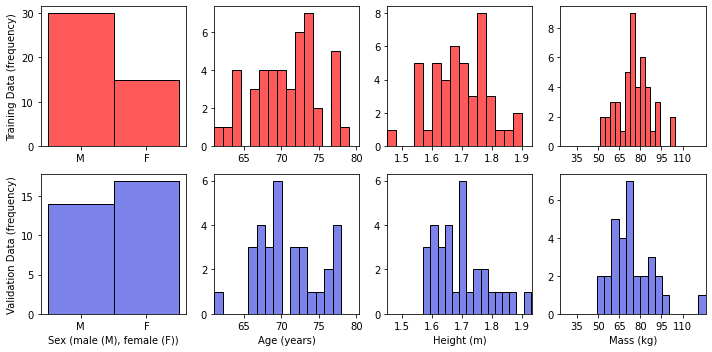

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

# sns.set(style="whitegrid")
colors = ['#87CC94', '#25CB00', '#FF9999', '#FF5A5A', '#7c84eb', '#0313fc']

train_data['height_m'] = train_data['height'] / 100
test_data['height_m'] = test_data['height'] / 100


# Remove duplicates based on 'id_all' column
train_dist = train_data.drop_duplicates(subset='id_all')
test_dist = test_data.drop_duplicates(subset='id_all')

fig, axs = plt.subplots(2, 4, figsize=(10, 5)) # create 2x4 subplots

variables = ['female', 'age', 'height_m', 'mass'] # variables to plot
labels = ['Sex (male (M), female (F))', 'Age (years)', 'Height (m)', 'Mass (kg)' ] # labels to plot

# Set common labels
axs[0, 0].set_ylabel('Training Data (frequency)')
axs[1, 0].set_ylabel('Validation Data (frequency)')

for i, var in enumerate(variables):
    if var == 'female':
        bins = 2
    else:
        bins = 15

    # Train data histogram
    axs[0, i].hist(train_dist[var], bins=bins, color=colors[3], alpha=1, edgecolor='black')
    # Validation data histogram
    axs[1, i].hist(test_dist[var], bins=bins, color=colors[4], alpha=1, edgecolor='black')

    # Set x labels
    axs[1, i].set_xlabel(labels[i])

    # Set x limits
    if var != 'female':
        combined_dist = pd.concat([train_dist, test_dist])
        mean = combined_dist[var].mean()
        lowest_value = min(combined_dist[var])
        highest_value = max(combined_dist[var])
        max_distance_to_mean = max(math.fabs(mean - lowest_value), math.fabs(mean - highest_value))
        axs[0, i].set_xlim(mean - max_distance_to_mean, mean + max_distance_to_mean)
        axs[1, i].set_xlim(mean - max_distance_to_mean, mean + max_distance_to_mean)

    # Set x ticks
    if var == 'height_m':
        axs[0, i].set_xticks([1.5, 1.60, 1.70, 1.80, 1.90])
        axs[1, i].set_xticks([1.5, 1.60, 1.70, 1.80, 1.90])
    if var == 'mass':
        axs[0, i].set_xticks([35, 50, 65, 80, 95, 110])
        axs[1, i].set_xticks([35, 50, 65, 80, 95, 110])
    if var == 'female':
        axs[0, i].set_xticks([0.25, 0.75])
        axs[0, i].set_xticklabels(['M', 'F'])
        axs[1, i].set_xticks([0.25, 0.75])
        axs[1, i].set_xticklabels(['M', 'F'])

# Center the plots
for ax_row in axs:
    for ax in ax_row:
        ax.set_xlim(ax.get_xlim())

plt.tight_layout()
plt.savefig("figures/data_distribution.pdf", format='pdf')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

def create_distribution_table(train_data, test_data):
    """
    Creates a summary table of data distributions for both training and validation datasets.
    Shows male/female counts instead of percentages.
    """
    # Convert height to meters
    train_data['height_m'] = train_data['height'] / 100
    test_data['height_m'] = test_data['height'] / 100

    # Remove duplicates based on 'id_all' column
    train_dist = train_data.drop_duplicates(subset='id_all')
    test_dist = test_data.drop_duplicates(subset='id_all')

    # Variables to analyze
    variables = ['female', 'age', 'height_m', 'mass']

    # Initialize lists to store results
    results = []

    for var in variables:
        # Calculate statistics for training data
        train_stats = {
            'Variable': var,
            'Dataset': 'Training',
            'Count': len(train_dist[var]),
            'Mean': train_dist[var].mean(),
            'Std': train_dist[var].std(),
            'Min': train_dist[var].min(),
            'Q1': train_dist[var].quantile(0.25),
            'Median': train_dist[var].median(),
            'Q3': train_dist[var].quantile(0.75),
            'Max': train_dist[var].max()
        }
        results.append(train_stats)

        # Calculate statistics for validation data
        test_stats = {
            'Variable': var,
            'Dataset': 'Validation',
            'Count': len(test_dist[var]),
            'Mean': test_dist[var].mean(),
            'Std': test_dist[var].std(),
            'Min': test_dist[var].min(),
            'Q1': test_dist[var].quantile(0.25),
            'Median': test_dist[var].median(),
            'Q3': test_dist[var].quantile(0.75),
            'Max': test_dist[var].max()
        }
        results.append(test_stats)

    # Create DataFrame
    df_results = pd.DataFrame(results)

    # Format numeric columns
    numeric_cols = ['Mean', 'Std', 'Min', 'Q1', 'Median', 'Q3', 'Max']
    df_results[numeric_cols] = df_results[numeric_cols].round(3)

    # Add actual counts for male/female distribution
    for dataset, data in [('Training', train_dist), ('Validation', test_dist)]:
        if 'female' in data.columns:
            female_counts = data['female'].value_counts()
            male_count = female_counts.get(0, 0)
            female_count = female_counts.get(1, 0)
            mask = (df_results['Variable'] == 'female') & (df_results['Dataset'] == dataset)
            df_results.loc[mask, 'Distribution'] = f"M: {male_count}, F: {female_count}"

    # Reorder columns
    column_order = ['Variable', 'Dataset', 'Count', 'Distribution', 'Mean', 'Std',
                    'Min', 'Q1', 'Median', 'Q3', 'Max']
    df_results = df_results[column_order]

    return df_results

# Example usage:
distribution_table = create_distribution_table(train_data, test_data)
print(distribution_table.to_string(index=False))

# To save to CSV:
# distribution_table.to_csv("data_distribution.csv", index=False)

# To create a styled HTML table:
def style_distribution_table(df):
    return (df.style
            .set_properties(**{'text-align': 'center'})
            .set_table_styles([
                {'selector': 'th', 'props': [('text-align', 'center'),
                                           ('background-color', '#f2f2f2'),
                                           ('padding', '8px')]},
                {'selector': 'td', 'props': [('padding', '8px')]}
            ])
            .format({col: '{:.3f}' for col in df.select_dtypes('float64').columns})
            .hide(axis='index'))

# styled_table = style_distribution_table(distribution_table)
# styled_table.to_html('data_distribution.html')

Variable    Dataset  Count Distribution   Mean    Std   Min    Q1  Median    Q3    Max
  female   Training     45 M: 30, F: 15  0.333  0.477  0.00  0.00    0.00  1.00   1.00
  female Validation     31 M: 14, F: 17  0.548  0.506  0.00  0.00    1.00  1.00   1.00
     age   Training     45          NaN 70.622  4.308 61.00 68.00   71.00 73.00  79.00
     age Validation     31          NaN 70.806  4.230 61.00 67.50   70.00 73.50  78.00
height_m   Training     45          NaN  1.690  0.097  1.45  1.62    1.69  1.76   1.90
height_m Validation     31          NaN  1.696  0.090  1.57  1.63    1.69  1.75   1.93
    mass   Training     45          NaN 75.390 11.891 51.50 69.20   75.80 82.70 104.52
    mass Validation     31          NaN 74.057 15.757 49.10 63.80   71.05 83.40 126.41


/var/folders/8q/byh6pjkx74d7p_crfrzgdpbd2xgt0t/T/ipykernel_36697/768875402.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['height_m'] = train_data['height'] / 100
/var/folders/8q/byh6pjkx74d7p_crfrzgdpbd2xgt0t/T/ipykernel_36697/768875402.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['height_m'] = test_data['height'] / 100


# Stratified sampling (obsolete)

In [22]:
from sklearn.model_selection import train_test_split

# Group by 'study' and 'condition'
grouped = df.groupby(['study', 'condition'])

# Initialize an empty dictionary to store the results
splits = {}

# For each group
for (study, condition), group in grouped:
    # Get unique 'id_all'
    unique_ids = group['id_all'].unique()

    # Split into train and test
    # Random number selected between 1->1,000,000
    train_ids, test_ids = train_test_split(unique_ids, test_size=0.4)

    # Store the results
    splits[(study, condition)] = {
        'train': train_ids.tolist(),
        'test': test_ids.tolist()
    }

# Convert the splits dictionary to a DataFrame
splits_df = pd.DataFrame.from_dict(splits, orient='index')

# Optional: reset the index to have 'study' and 'condition' as columns instead of index
splits_df.reset_index(inplace=True)
splits_df.columns = ['study', 'condition', 'train', 'test']

splits_df


,study,condition,train,test
0,heatwave 1 (prolonged),hot,"[69, 80, 72, 64, 36, 66, 68, 63, 62, 37, 21, 3...","[77, 65, 24, 74, 71, 23, 61, 76, 40, 33, 79, 3..."
1,heatwave 2 (indoor),cool,"[46, 57, 29, 53, 55, 26, 83, 48, 84]","[85, 82, 86, 23, 24, 81, 41]"
2,heatwave 2 (indoor),hot,"[57, 93, 29, 84, 41, 98, 75, 95, 87, 89, 77, 2...","[86, 82, 83, 53, 74, 65, 24, 67, 78, 94, 90, 4..."
3,heatwave 2 (indoor),temp,"[82, 41, 53, 26, 83, 55, 81, 24, 48]","[85, 29, 57, 23, 86, 84, 46]"
4,heatwave 2 (indoor),warm,"[24, 87, 92, 91, 23, 84, 55, 96, 90, 78, 85, 8...","[83, 53, 68, 74, 98, 46, 29, 89, 65, 94, 41, 9..."
5,heatwave 3 (cooling),hot,"[55, 56, 41, 59, 43, 47, 42, 49, 54, 60, 52]","[48, 57, 50, 44, 46, 53, 45, 58]"
